In [123]:
import numpy as np


In [124]:
import pandas as pd

In [148]:
import matplotlib.pyplot as plt

In [126]:
variable=pd.read_csv(r"E:\cyber lab\mnist_train_small - Copy.csv")
variable.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
test_set=pd.read_csv(r"E:\cyber lab\mnist_test - Copy.csv")
test_set.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
X_train=variable.iloc[:,1:785]

X_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
Y_train=variable.iloc[:,0]
Y_train.head()

0    6
1    5
2    7
3    9
4    5
Name: y, dtype: int64

In [130]:
X_test=test_set.iloc[:,1:785]
X_test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
Y_test=test_set.iloc[:,0]
Y_test.head()

0    7
1    2
2    1
3    0
4    4
Name: y, dtype: int64

In [132]:
#step 1
def initialize_parameters(lenw):
    w=np.random.randn(1,lenw)
    b=0
    return w,b

In [133]:
#step 2
def forward_prop(X_train,w,b):
    z=np.dot(w,X_train)+b
    return z

In [134]:
#step 3
def cost_function(z,Y_train):
    m=Y_train.shape[1]
    J=(1/(2*m))*np.sum(np.square(z-Y_train))
    return J

In [135]:
#step 4
def backward_prop(X_train,Y_train,z):
    m=Y_train.shape[1]
    dz=1/m*(z-Y_train)
    dw=np.dot(dz,X_train.T)
    db=np.sum(dz)
    return dw,db

In [136]:
#step 5
def gradient_descent_update(w,b,dw,db,learning_rate):
    w=w-learning_rate*dw
    b=b-learning_rate*db
    return w,b

In [149]:
#step 6
def linear_regression_model(X_train,Y_train,X_val,Y_val,learning_rate,epochs):
    lenw=X_train.shape[0]
    w,b=initialize_parameters(lenw)
    costs_train=[]
    m_train=Y_train.shape[1]
    m_val=Y_val.shape[1]
    for i in range(1,epochs+1):
        z_train=forward_prop(X_train,w,b)
        cost_train=cost_function(z_train,Y_train)
        dw,db=backward_prop(X_train,Y_train,z_train)
        w,b=gradient_descent_update(w,b,dw,db,learning_rate)
        
        if i%10==0:
            costs_train.append(cost_train)
        
        MAE_train=(1/m_train)*np.sum(np.abs(z_train-Y_train))
        
        z_val=forward_prop(X_val,w,b)
        cost_val=cost_function(z_val,Y_val)
        MAE_val=(1/m_val)*np.sum(np.abs(z_val-Y_val))
    
    plt.plot(costs_train)
    plt.xlabel('iteration(per tens)')
    plt.ylabel('training cost')
    plt.title('learning rate' + str(learning_rate))
    plt.show()
        

In [138]:
X_train.shape

(20000, 784)

In [139]:
X_train=X_train.T

In [140]:
X_train.shape

(784, 20000)

In [141]:
Y_train.shape

(20000,)

In [142]:
Y_train=np.array([Y_train])
Y_train.shape

(1, 20000)

In [143]:
X_test=X_test.T

In [144]:
Y_test=np.array([Y_test])

In [145]:
X_test.shape

(784, 10000)

In [146]:
Y_test.shape

(1, 10000)

C:\Users\WELCOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


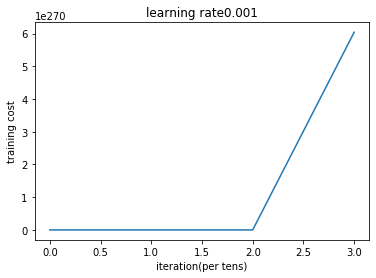

In [153]:
linear_regression_model(X_train,Y_train,X_test,Y_test,0.001,1000)